In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

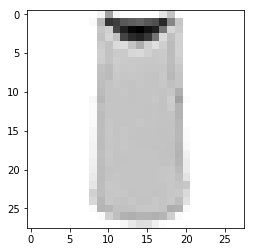

In [9]:
plt.imshow(x_train[2],cmap='Greys')

In [11]:
x_train = x_train.reshape(60000,28,28,1)/255

In [13]:
x_test = x_test.reshape(10000,28,28,1)/255 

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### 讀入必要函式

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD

### S1. 打造函數學習機

In [75]:
model = Sequential()

In [76]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))

In [77]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [78]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))

In [79]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [80]:
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))

In [81]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [82]:
model.add(Flatten())

In [83]:
model.add(Dense(128,activation='relu'))

In [84]:
model.add(Dense(10,activation='softmax'))

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

### 因為使用原本的optimizer-SGD學習出的模型準確度太低不超過0.2，因此google去找別人如何訓練模型，發現很多人使用adam作為optimizer，所以我在這邊修改了optimizer，發現準確率高了許多。

In [86]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

### S2. fit

### 雖然準確率高上許多，但是無法突破0.9，因此修改了loss function變成mae發現沒甚麼改變

In [87]:
model.fit(x_train,y_train,batch_size=256,epochs=12)

Epoch 1/12
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0615 - acc: 0.4820
Epoch 2/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0366 - acc: 0.7359
Epoch 3/12
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0329 - acc: 0.7669
Epoch 4/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0301 - acc: 0.7908
Epoch 5/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0283 - acc: 0.8034
Epoch 6/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0265 - acc: 0.8152
Epoch 7/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0250 - acc: 0.8257
Epoch 8/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0240 - acc: 0.8336
Epoch 9/12
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0229 - acc: 0.8409
Epoch 10/12
60000/60000 [==============================] - 5s 89us/sample - loss: 

In [88]:
model.fit(x_train,y_train,batch_size=256,epochs=12)

Epoch 1/12
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0200 - acc: 0.8610
Epoch 2/12
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0191 - acc: 0.8686
Epoch 3/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0189 - acc: 0.8698
Epoch 4/12
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0185 - acc: 0.8722
Epoch 5/12
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0183 - acc: 0.8741
Epoch 6/12
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0178 - acc: 0.8778
Epoch 7/12
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0175 - acc: 0.8798
Epoch 8/12
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0174 - acc: 0.8810
Epoch 9/12
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0170 - acc: 0.8840
Epoch 10/12
60000/60000 [==============================] - 6s 108us/sample - l

### 將Con2D的層數改為32,64,128，有比原本的好一點，但是也無法在24的訓練後準確率突破0.9。

In [89]:
model.fit(x_train,y_train,batch_size=256,epochs=12)

Epoch 1/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0161 - acc: 0.8909
Epoch 2/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0158 - acc: 0.8927
Epoch 3/12
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0156 - acc: 0.8939
Epoch 4/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0155 - acc: 0.8939
Epoch 5/12
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0152 - acc: 0.8974
Epoch 6/12
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0150 - acc: 0.8980
Epoch 7/12
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0149 - acc: 0.8995
Epoch 8/12
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0146 - acc: 0.9010
Epoch 9/12
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0144 - acc: 0.9021
Epoch 10/12
60000/60000 [==============================] - 5s 91us/sample - loss

In [90]:
result = model.predict_classes(x_test)

In [103]:
name = ['top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def my_predict(n):
    print("我可愛的cnn預測是: ", name[result[n]])
    print("正確答案是: ", y_test[n])
    X=x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

我可愛的cnn預測是:  Trouser
正確答案是:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


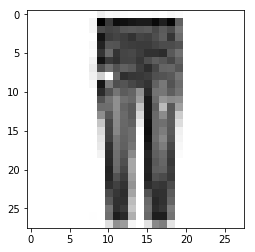

In [108]:
my_predict(200)

In [109]:
from ipywidgets import interact_manual

In [107]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>